In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.multitest import multipletests
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score,classification_report,mean_squared_error,confusion_matrix,r2_score

#### **Dataset Description**:

#### The Breast Cancer Dataset contains features computed from a digitized image of a fine needle aspirate of a breast mass. The goal is to classify whether cancer is malignant or benign.


In [2]:
# read file
can = pd.read_csv('Cancer.csv')
can.head() #view the csv

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Cleaning the Dataset by checking for any nissing vlaues and removing unamed columns**

In [3]:
can= can.drop(columns= ['id']) #drop id
can.dropna()
can = can.loc[:, ~can.columns.str.contains('^Unnamed')]

In [4]:
# check na values
can.isna().sum()
# there is no null values

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

1. **Data Exploration and Visualization** 

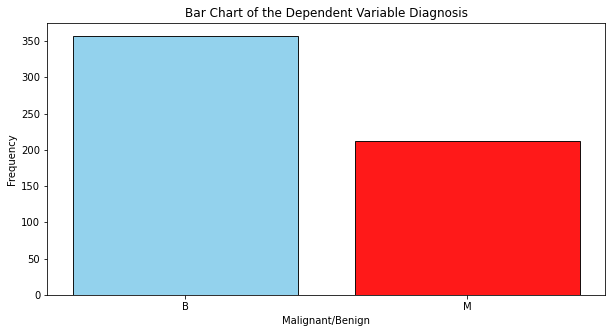

In [5]:
# barchart for diagnosis
diagnosis_counts = can['diagnosis'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(diagnosis_counts.index, diagnosis_counts, color=['skyblue', 'red'], edgecolor='black', alpha=0.9)
plt.title('Bar Chart of the Dependent Variable Diagnosis')
plt.xlabel('Malignant/Benign')
plt.ylabel('Frequency')
plt.show()

#### Interpretations: Majority of the breast cancer diagonsis are benign. In this sample, about 350 cancers are Benign, and about 200 cancers are Malignant.

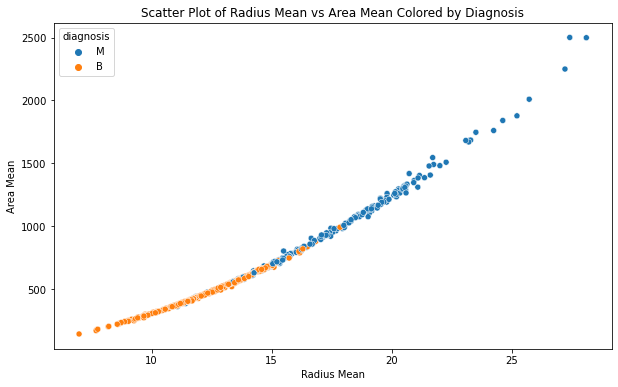

In [6]:
# scatter plot of radius mean vs. area_mean
plt.figure(figsize=(10, 6))
sns.scatterplot(data=can, x='radius_mean', y='area_mean', hue='diagnosis')
plt.xlabel('Radius Mean')
plt.ylabel('Area Mean')
plt.title('Scatter Plot of Radius Mean vs Area Mean Colored by Diagnosis')
plt.show()

#### Interpretations: Maglignant Tumors have the Radius Mean and Area Mean are both higher as compared for Beign Tumors in Breast Cancer.

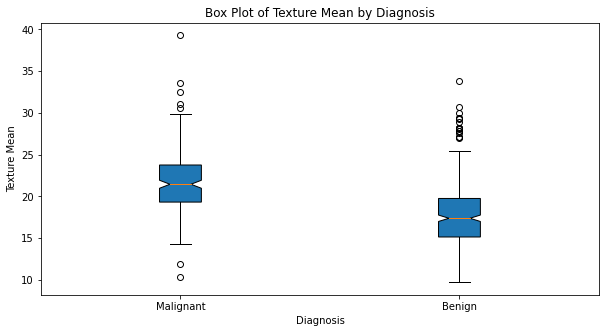

In [7]:
# box plot of texture mean vs. diagnosis
plt.figure(figsize=(10, 5))
plt.boxplot([can[can['diagnosis']=='M']['texture_mean'], can[can['diagnosis']=='B']['texture_mean']], labels=['Malignant', 'Benign'], notch=True, vert=True, patch_artist=True)
plt.xlabel('Diagnosis')
plt.ylabel('Texture Mean')
plt.title('Box Plot of Texture Mean by Diagnosis')
plt.show()

#### Interpretations: The box plot shows Maglinant and Benign both have high texture mean but the mean for Malignant is higher than Benign tumors for breat cancer. 

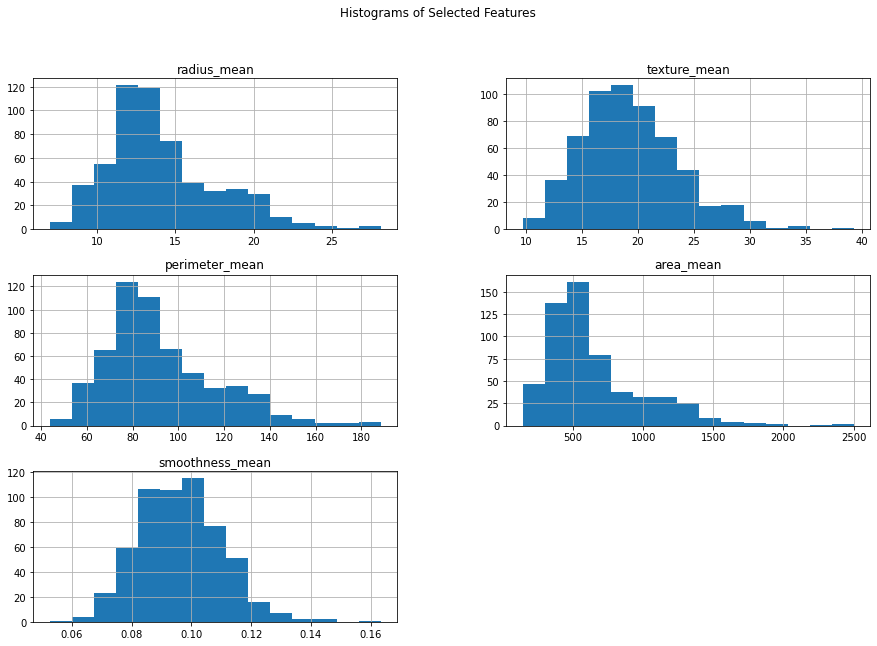

In [8]:
## Some interesting features to look at
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

# Histograms for the selected features
can[features].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Selected Features')
plt.show()

#### Interpretations: Examining of the features with respect to both tumors is really important for the analysis and I came across that the radius_mean, area_mean, perimeter_mean, texture_mean, and smoothness_mean exhibit right/positive skewness.  

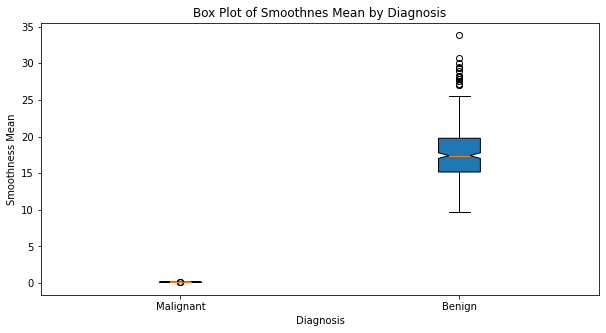

In [9]:
# box plot of smoothness_mean vs. diagnosis
plt.figure(figsize=(10, 5))
plt.boxplot([can[can['diagnosis']=='M']['smoothness_mean'], can[can['diagnosis']=='B']['texture_mean']], labels=['Malignant', 'Benign'], notch=True, vert=True, patch_artist=True)
plt.xlabel('Diagnosis')
plt.ylabel('Smoothness Mean')
plt.title('Box Plot of Smoothnes Mean by Diagnosis')
plt.show()

### Interpretation: The barplot clearly shows that Benign Tumor has higher smoothness mean in comparison to the Malignant Tumor for the breast cancer sample. 

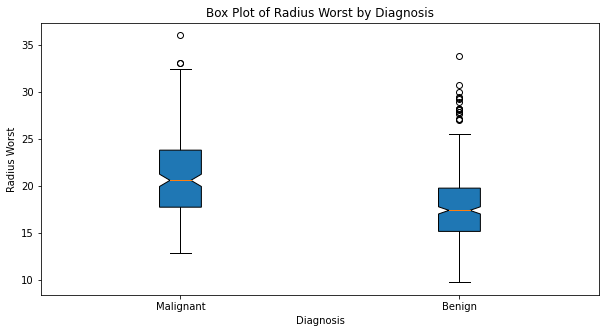

In [10]:
#box plot of radius_worst vs. diagnosis
plt.figure(figsize=(10, 5))
plt.boxplot([can[can['diagnosis']=='M']['radius_worst'], can[can['diagnosis']=='B']['texture_mean']], labels=['Malignant', 'Benign'], notch=True, vert=True, patch_artist=True)
plt.xlabel('Diagnosis')
plt.ylabel('Radius Worst')
plt.title('Box Plot of Radius Worst by Diagnosis')
plt.show()

### Interpretation: The box plot shows that as the radius of tumor at its worst state increases, the tumor is more likely to be malignant.

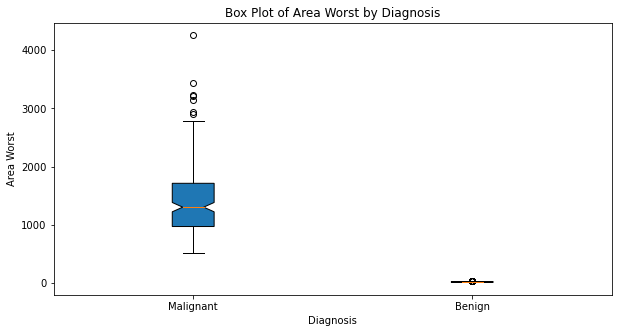

In [11]:
#box plot of area_worst vs. diagnosis
plt.figure(figsize=(10, 5))
plt.boxplot([can[can['diagnosis']=='M']['area_worst'], can[can['diagnosis']=='B']['texture_mean']], labels=['Malignant', 'Benign'], notch=True, vert=True, patch_artist=True)
plt.xlabel('Diagnosis')
plt.ylabel('Area Worst')
plt.title('Box Plot of Area Worst by Diagnosis')
plt.show()

### Interpretation: The box plot indicates that if the area is larger in size, it is most likely to be Maglinant Tumor and less likely to be Benign Tumor. 

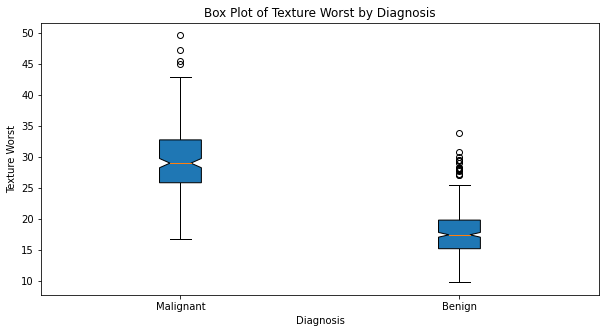

In [12]:
#box plot of texture_worst vs. diagnosis
plt.figure(figsize=(10, 5))
plt.boxplot([can[can['diagnosis']=='M']['texture_worst'], can[can['diagnosis']=='B']['texture_mean']], labels=['Malignant', 'Benign'], notch=True, vert=True, patch_artist=True)
plt.xlabel('Diagnosis')
plt.ylabel('Texture Worst')
plt.title('Box Plot of Texture Worst by Diagnosis')
plt.show()

### Interpretation: The box plot shows that as the texture of tumor at its worst state increases,and when it does, the tumor is more likely to be malignan than benign.

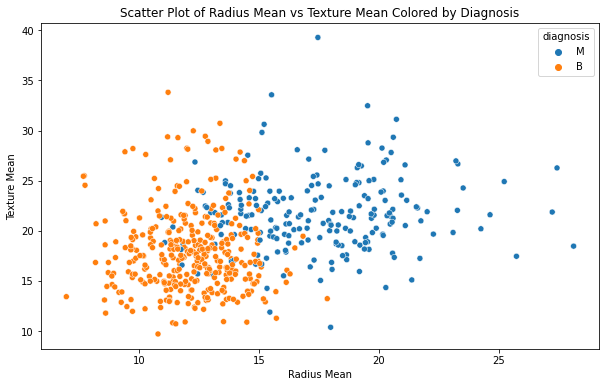

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=can, x='radius_mean', y='texture_mean', hue='diagnosis')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('Scatter Plot of Radius Mean vs Texture Mean Colored by Diagnosis')
plt.show()

### Interpretation: The scatterplot shows that Malignant diagnosis has higher radius mean and texture mean. It is known that Malignant tumor is worse and the scatter plot reflects it.

## **Logistic Regression Model Development** 

#### In developing the logistic regression to predict cancer maglignancy, the process involved by eliminating missing values, dropping unnamed columns, and encoding diagnosis into M->1 and B->0. By examining variables using visualization for relation between tumors and variables to get a clear understanding of the dataset. 

#### After the data cleaning and visualizaton, we spilt the data into train and test for model builing. The logistic regression was a suitable choice because of the binary (0,1) elements that measure the cancer maglignancy. We used 0.8 for train_size = 0.8, this decision to allocate a larger portion to training is to allow the model to learn from the data and potentially reduce false positives. 

In [14]:
# transfer malignant to 0 and benign to 1
can.loc[can['diagnosis'] == 'M','diagnosis'] = 0
can.loc[can['diagnosis'] == 'B','diagnosis'] = 1
can['diagnosis'] = can['diagnosis'].astype(float)
# split the dataset into training and testing sample
train,val = train_test_split(can, train_size = 0.8)

In [15]:
# define the independent and dependent variables
x = train.drop(['diagnosis'],axis = 1).values
y = train['diagnosis'].values
model = LogisticRegression(max_iter=2500) # allow for more number of iteration for logit to converge
model.fit(x,y)

LogisticRegression(max_iter=2500)

In [16]:
# out sample prediction and performance evaluation
logit_pred = model.predict(val.drop(['diagnosis'],axis = 1).values)
accuracy_score(val['diagnosis'],logit_pred)

0.9385964912280702

In [17]:
coefficients = model.coef_
print("Coefficients:", coefficients)

Coefficients: [[ 0.71756968  0.19740919 -0.06759685  0.01433342 -0.10380102 -0.14104171
  -0.32937227 -0.16850868 -0.14075348 -0.02719695 -0.0206856   1.27177068
  -0.42076659 -0.08517509 -0.01614697  0.01585742 -0.04647963 -0.02683001
  -0.02037523  0.00633154  0.46279022 -0.43086195 -0.26735184 -0.0102658
  -0.21427668 -0.56972168 -1.07842515 -0.3770599  -0.40431295 -0.08486292]]


In [18]:
intercept = model.intercept_
print("Intercept:", intercept)

Intercept: [26.99030822]


#### Summary: The intercept and coefficients of the model are as shown above, with Benign Tumor as the baseline. Holding all other variables constant, the log-odds of being diagnosed with a Benign Tumor increases by approximately 26.99%. 

## **Model Evaluation** 


In [19]:
accuracy = accuracy_score(val['diagnosis'], logit_pred)
print("Accuracy Score:", accuracy)

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(val['diagnosis'], logit_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(val['diagnosis'], logit_pred))

Accuracy Score: 0.9385964912280702

Confusion Matrix:
[[46  0]
 [ 7 61]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93        46
         1.0       1.00      0.90      0.95        68

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.95      0.94      0.94       114



### Interpretation: The logistic regression model achieved an accuracy of 94.7%  in classifying the tumors into Malignant Tumor and Benign Tumor. The precicion in predicting the Benign Tumor cases is 96% from confusion matrix. Overall, the model reflects good capabilities to classify tumors. 

In [20]:
# RMSE
np.sqrt(mean_squared_error(val['diagnosis'],logit_pred))

0.24779731389167603

### Interpretation: RMSE for the logistic regression is 0.247, lower RMSE generally indicates better predictive accuracy hence the model's performance will be assessed with other in q4 and q5 after we make a reduced model and add interactions to compare RMSE. 

In [21]:
# R^2
r2_score(val['diagnosis'],logit_pred)

0.7448849104859335

### Interpretation: The R^2 value is 0.744, signifying a high value. This implies that 74.4% of the variance in the diagnosis is accounted for by the logistic model. Hence, the logistic model performs well when considering R^2. High R^2 reflects strong predictive capability of the model. 

## **Testing Interactions Between Features** 


In [22]:
# create interaction terms of diagnosis * radius mean
can['radius_int'] = can['diagnosis'] * can['radius_mean']
# create interaction terms of diagnosis *texture mean
can['texture_int'] = can['diagnosis'] * can['texture_mean']
# create interaction terms of diagnosis * perimeter_mean
can['perimeter_int'] = can['diagnosis']* can['perimeter_mean']

In [23]:
can.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,radius_int,texture_int,perimeter_int
564,0.0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.00,0.00,0.00
565,0.0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.00,0.00,0.00
566,0.0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.00,0.00,0.00
567,0.0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.00,0.00,0.00
568,1.0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,7.76,24.54,47.92


In [24]:
# split the dataset to train and test set
train4,test4 = train_test_split(can,train_size = 0.8)

# build the linear regression model with interactions using sklearn
x4_split = train4.drop(['diagnosis'], axis = 1).values
y4_split = train4['diagnosis'].values
model4 = LinearRegression()
model4.fit(x4_split,y4_split)

LinearRegression()

In [25]:
# out-sample prediction
linear_pred = model4.predict(test4.drop(['diagnosis'], axis = 1).values)
linear_pred[(linear_pred>1)|(linear_pred<0)]

array([-0.13793227, -0.12356048,  1.02404727,  1.02216063,  1.00972831,
        1.0378621 ,  1.00257866,  1.02923897,  1.13380645, -0.00951212,
       -0.05062771,  1.02709793, -0.00317025,  1.021557  ,  1.05301533,
       -0.02623173,  1.02256912, -0.00807286, -0.02419376,  1.03078868,
       -0.0532    ,  1.00655498,  1.05273695,  1.00828188, -0.05439482,
        1.01254261, -0.02064917, -0.0497871 , -0.06693119,  1.0220562 ,
       -0.03720336, -0.01401104, -0.00569538,  1.03794067, -0.07159718,
        1.00391429, -0.01708826, -0.03163425, -0.02851387,  1.03032374,
       -0.01461864, -0.03542716, -0.05292224,  1.00082717,  1.01120876,
       -0.04333501, -0.0834842 ,  1.023172  ,  1.12578496, -0.02257167,
        1.034661  , -0.01316806,  1.01834356,  1.01460834])

### Intepretation: **Issue with Linear Regression for Binary Outcomes**

### The out-sample prediction above shows one problem of use linear regression to predict binary outcomes. The predictued values smaller than 0 and larger than 1, this is faulty since the binary outcome are 0 and 1. This is hard to explain since the predicted values are ranging from 0-1. 

In [26]:
coefficients = model4.coef_
print("Coefficients:", coefficients)

Coefficients: [-9.56399387e-02 -3.56768952e-03 -1.79746074e-03  9.37105222e-04
 -3.72103589e-01  3.55673741e-01 -4.24710361e-01  7.50819021e-01
  1.85872219e-01  3.87691293e-02  7.63893202e-03  3.70362023e-04
  1.66647873e-02 -1.49623858e-03  5.84707840e-01 -2.52959177e-01
  9.10549750e-01 -1.49781641e+00 -4.17190071e-01  2.72474938e+00
 -1.54443947e-02 -1.42943455e-03 -4.08308147e-04  1.61906322e-04
  3.83188908e-01  1.37879437e-02 -3.08085582e-02 -2.43527305e-01
 -6.21504135e-03 -5.84134864e-01  1.37378640e-01  7.72610630e-03
 -1.23922387e-02]


In [27]:
# R^2
r2_score(val['diagnosis'],linear_pred)

-0.8515809487428418

In [28]:
# RMSE
np.sqrt(mean_squared_error(val['diagnosis'],linear_pred))

0.6675747052183517

### Interpretation: The RMSE for the linear regression is 0.667 which indicates the deviation from actual values and the RMSE is high which means the accuracy is poor. The R^2 is -0.851 which is an unsual value and it might is due to issues with fitting the data in the linear regression model. Hence, linear regression in classification of the tumor has unsuccessful results. 

## **Feature Selection and Cross-Validation: Full vs. Reduced Model**

### To begin building the reduced model, I used FDR BH-procedure to find a significant p-value that will allow valid features to be a part of the model. The FDR BH-procedure is a method that we learned helps in identifying false positives for feature selection.

In [29]:
cancer_df = can.copy() # recreated the df to have interactions elmininated

In [30]:
# excluded the interactions terms 
cancer_df = cancer_df.drop(['radius_int', 'texture_int','perimeter_int'], axis=1)
X = cancer_df.drop(['diagnosis'], axis=1)
y = cancer_df['diagnosis'] 

In [31]:
# form p values to use fdr technique
p_values = []
for column in X.columns:
    X_col = sm.add_constant(X[[column]])
    X_array = np.asarray(X_col)
    y_array = np.asarray(y)
    # disp= 0 suppress output
    model = sm.Logit(y, X_col).fit(disp=0)
    # p-value from the features
    p_values.append(model.pvalues[1])  

In [32]:
p_values
# all the p-values

[1.2510153348571636e-28,
 2.827232274379715e-19,
 2.4479522198440635e-28,
 3.468842267714744e-27,
 1.7476949598430132e-15,
 3.4831397158652845e-30,
 5.418764267869059e-34,
 8.624072326277675e-32,
 2.2881935414751636e-13,
 0.7594709672357755,
 2.3431702025170145e-28,
 0.8430081276003628,
 1.898535821990848e-28,
 1.4684112892831368e-26,
 0.11251098732042425,
 1.4301612442625193e-10,
 3.4500046540169186e-09,
 3.595682785995045e-18,
 0.8763826740717153,
 0.07055555239597285,
 2.9520527179095437e-23,
 2.0144506416929795e-22,
 2.3014484673008245e-23,
 1.1774546641206756e-22,
 1.3096263676563101e-19,
 2.0180893694089014e-30,
 5.6645589433946094e-33,
 1.2069861543949608e-30,
 3.493150959308856e-18,
 9.925173065731854e-13]

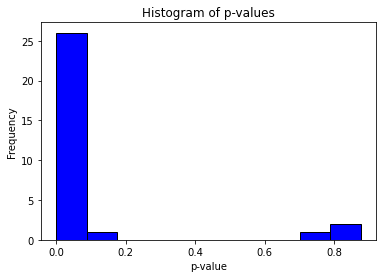

In [33]:
p_values = p_values

# Plot the histogram of p-values
plt.hist(p_values, color="blue", edgecolor="black")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.title("Histogram of p-values")
plt.show()

In [34]:
# define the function for BH procedure
def fdr(pvals, q, plotit=False):
  # Remove NA values
  pvals = np.array(pvals)
  pvals = pvals[~np.isnan(pvals)]
  N = len(pvals)

  # Sort the p-values and calculate the FDR threshold
  sorted_pvals = np.sort(pvals)
  k = np.arange(1, N+1)
  fdr_threshold = (q * k) / N

  # Find the last p-value that is below the FDR threshold
  below_threshold = sorted_pvals <= fdr_threshold
  max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
  alpha = sorted_pvals[max_index]

  # Count number of p-values below threshold
  true_discoveries = sum(below_threshold)
  print(f"Alpha: {alpha}")
  print(f"Number of true discoveries: {true_discoveries}")

  # Optional plot
  if plotit:
    plt.scatter(range(N), sorted_pvals, c=np.where(sorted_pvals <= alpha, 'red', 'grey'), marker='o')
    plt.yscale('log')
    plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
    plt.xlabel("Tests ordered by p-value")
    plt.ylabel("p-values")
    plt.title(f"FDR = {q}")
    plt.show()

  return alpha, true_discoveries

### The q value I chose is 0.05 to ensure that we can identify features and have only 5% false positives.  

Alpha: 3.4500046540169186e-09
Number of true discoveries: 25


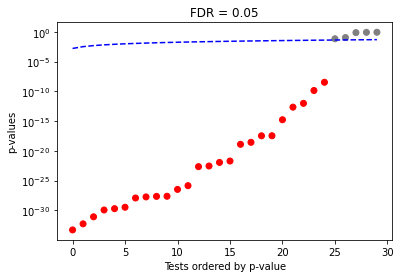

In [35]:
alpha_threshold = fdr(p_values, 0.05, plotit=True)

### The p-value generated by the FDR BH-procedure is 0.000000000345, so I will be using that as my cutoff value to eliminate features for my reduced model. 

In [36]:
reject, pvals_corrected, _, _ = multipletests(p_values, alpha=0.00000000345, method='fdr_bh')
#pick features where null hypothesis  rejected
selected_features = X.columns[reject]
print("selected features filtered after fdr cutoff:", selected_features)

selected features filtered after fdr cutoff: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'compactness_se', 'concave points_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [37]:
len(selected_features)

24

In [38]:
reject

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

### After the FDR, we selected 24 features for the reduced model, the selected features are - 
radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se','area_se', 'compactness_se', 'concave points_se', 'radius_worst','texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst', 'concavity_worst', 'concave points_worst','symmetry_worst', 'fractal_dimension_worst

In [39]:
# keep independent variables that are still significant after pvalues are adjusted
reduced_var = X.columns[reject]
len(reduced_var)

24

In [40]:
reduced_var

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'compactness_se', 'concave points_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Model Building for the Reduced Model 

In [41]:
# build the reduced model
reduced_x = X[reduced_var]
reduced_y = can['diagnosis']


model5 = sm.Logit(reduced_y, sm.add_constant(reduced_x), max_iter=3000)
result = model5.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.037463
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      544
Method:                           MLE   Df Model:                           24
Date:                Thu, 25 Jan 2024   Pseudo R-squ.:                  0.9433
Time:                        23:44:45   Log-Likelihood:                -21.316
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                3.479e-134
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      41.4908     32.408      1.280      0.200     -22.028  

## K_Fold Analysis for Cross Validation

In [42]:
# Define K for K-Fold cross-validation
K = 10
fold_size = len(X) // K
# 10% data -> testing
# 90% -> training

In [43]:
# Initialize list to store accuracy for each fold
accuracies_full = []

# Perform K-Fold Cross-Validation
for k in range(K):
    # Create indices for the test set
    test_indices = list(range(k * fold_size, (k + 1) * fold_size))

    # Split the data into training and testing sets
    # 100% data -> remove 10% of it
    X_train_full = np.delete(np.array(X), test_indices, axis=0)
    y_train_full = np.delete(np.array(y), test_indices, axis=0)
    # 10% of it
    X_test_full = np.array(X)[test_indices]
    y_test_full = np.array(y)[test_indices]

    # Initialize and train the model
    model = LogisticRegression(max_iter=20000)
    # train on the 90% of the data
    model.fit(X_train_full, y_train_full)

    # Make predictions and evaluate the model
    # predict on the rest 10%
    predictions_full = model.predict(X_test_full)
    accuracy_full = accuracy_score(y_test_full, predictions_full)
    accuracies_full.append(accuracy_full)


In [44]:
len(X.columns)

30

In [45]:
accuracies_full

[0.875,
 0.9464285714285714,
 0.9464285714285714,
 0.9821428571428571,
 0.9642857142857143,
 0.9642857142857143,
 0.9642857142857143,
 0.9642857142857143,
 0.9285714285714286,
 0.9642857142857143]

In [46]:
# Calculate the average accuracy across all folds
average_accuracy = np.mean(accuracies_full)
print("Average Accuracy:", average_accuracy)

Average Accuracy: 0.95


In [47]:
r2_full = r2_score(y_test_full, predictions_full)
r2_full

0.735224586288416

In [48]:
rmse_full = np.sqrt(mean_squared_error(y_test_full, predictions_full))
rmse_full

0.1889822365046136

## The full model has 95% Accuracy, R square of 0.73, RMSE of 0.188, we will compare that with the reduced model below. 

In [63]:
## apply cross validation for reduced model
# Initialize list to store accuracy for each fold
K = 10
fold_size_reduced = len (reduced_x) // K
accuracies_reduced = []

# Perform K-Fold Cross-Validation
for k in range(K):
    # Create indices for the test set
    test_indices = list(range(k * fold_size_reduced, (k + 1) * fold_size_reduced))

    # Split the data into training and testing sets
    # 100% data -> remove 10% of it
    X_train_reduced = np.delete(np.array(reduced_x), test_indices, axis=0)
    y_train_reduced = np.delete(np.array(reduced_y), test_indices, axis=0)
    # 10% of it
    X_test_reduced = np.array(reduced_x)[test_indices]
    y_test_reduced = np.array(reduced_y)[test_indices]

    # Initialize and train the model
    reducedmodel = LogisticRegression(max_iter=20000)
    # train on the 90% of the data
    reducedmodel.fit(X_train_reduced, y_train_reduced)

    # Make predictions and evaluate the model
    # predict on the rest 10%
    predictions_reduced = reducedmodel.predict(X_test_reduced)
    accuracy_reduced = accuracy_score(y_test_reduced, predictions_reduced)
    accuracies_reduced.append(accuracy_reduced)


In [54]:
len(reduced_x.columns)

24

In [55]:
accuracies_reduced

[0.875,
 0.9642857142857143,
 0.9464285714285714,
 0.9821428571428571,
 0.9642857142857143,
 0.9642857142857143,
 0.9464285714285714,
 0.9642857142857143,
 0.9285714285714286,
 0.9642857142857143]

In [58]:
# Calculate the average accuracy across all folds
average_accuracy_red = np.mean(accuracies_reduced)
print("Average accuracy in reduced model:", average_accuracy_red)

Average accuracy in reduced model: 0.9642857142857142


## Interpetation: After analyzing both the models, full model with all the variables has 0.95 and reduced model with 24 features selected after the FDR analysis has 0.96 accuracy. My accuracy rate of both model is very close to each other, this could be due to feature redunduncy which might be an issue. The feature selection must have not been effective in excluding unnessecary predictors. I think the model would benefit by regularization. 


## In general, if a full model performs better than the reduced model that therotically means that the reduced model is underfitting and if a reduced model is better than we have a lot of insignificant variables. 

## As both the models have similar out-of-sample accuracy rate, it is showing that reduced model is performing at similar level so we can choose reduced model since it has fewer features and is parsimonic model. 

## In conclusion, reduced model maybe our better choice for prediction for the classification of the tumors due to higher accuracy rate, it would help if we further investigate the model to gain better results. 